<a href="https://colab.research.google.com/github/gurugeonu-02/gurugeonu-02/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B8%B0%EC%B4%88_%EC%88%98%ED%96%89%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
# 기본 환경설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings

from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [170]:
# 데이터 준비
data = pd.read_csv('data/userratingdata.csv')
problems = pd.read_csv('data/problemdata.csv')

In [171]:
# 사용자가 어떤 문제를 풀었는지에 대한 데이터
print(data.shape)
data.head()

(260, 3)


,userid,problemid,rating
0,1,2,5
1,1,29,4
2,1,22,3
3,1,16,2
4,1,34,1


In [172]:
# 문제에 대한 정보
print(problems.shape)
problems.head()

(90, 7)


,problem,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,pid
0,2,0,30,7,0,1,1001
1,23,0,0,0,1,0,1100
2,20,1,0,1,0,0,1051
3,14,0,1,0,0,0,1018
4,25,1,0,0,0,0,1145


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   userid     260 non-null    int64
 1   problemid  260 non-null    int64
 2   rating     260 non-null    int64
dtypes: int64(3)
memory usage: 6.2 KB


In [174]:
problems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   problem    90 non-null     int64
 1   ratings_1  90 non-null     int64
 2   ratings_2  90 non-null     int64
 3   ratings_3  90 non-null     int64
 4   ratings_4  90 non-null     int64
 5   ratings_5  90 non-null     int64
 6   pid        90 non-null     int64
dtypes: int64(7)
memory usage: 5.0 KB


In [175]:
train, test = train_test_split(data, test_size = 0.2) # 훈련 데이터 80%, 테스트 데이터 20%로 나눠줌
print(train.shape, test.shape)
train.head()

(208, 3) (52, 3)


,userid,problemid,rating
86,18,45,4
205,42,1,5
66,14,1,4
152,31,3,3
220,45,73,5


In [176]:
number_of_unique_user = len(data.userid.unique())
number_of_unique_problems = len(data.problemid.unique())
print("유저 수:", number_of_unique_user, ", 문제 수:", number_of_unique_problems)

유저 수: 52 , 문제 수: 90


# Attempt 1
    간단한 Dot Product 형태의 모델
    사용자 embedding과 problemembedding을 기반으로 나온 벡터 값을 Dot 연산을 통해 rating을 예측하는 방법

In [177]:
# Layer 만들기
problem_input = Input(shape=(1,), name='problem_input_layer')
user_input = Input(shape=(1,), name='user_input_layer')

problem_embedding_layer = Embedding(number_of_unique_problems+1, 8, name='problem_embedding_layer')
user_embedding_layer = Embedding(number_of_unique_user+1, 8, name='user_embedding_layer')

concate_layer = Concatenate()

problem_vector_layer = Flatten(name='problem_vector_layer')
user_vector_layer = Flatten(name='user_vector_layer')

dense_layer1 = Dense(128, activation='relu')
dense_layer2 = Dense(32, activation='relu')

result_layer = Dense(1)

In [178]:
# Layer 쌓기
problem_embedding = problem_embedding_layer(problem_input)
user_embedding = user_embedding_layer(user_input)

problem_vector = problem_vector_layer(problem_embedding)
user_vector = user_vector_layer(user_embedding)

concat = concate_layer([problem_vector, user_vector])
dense1 = dense_layer1(concat)
dense2 = dense_layer2(dense1)

result = result_layer(dense2)

model = Model(inputs=[user_input, problem_input], outputs=result)

In [179]:
# 모델의 구조
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 problem_input_layer (InputLaye  [(None, 1)]         0           []                               
 r)                                                                                               
                                                                                                  
 user_input_layer (InputLayer)  [(None, 1)]          0           []                               
                                                                                                  
 problem_embedding_layer (Embed  (None, 1, 8)        728         ['problem_input_layer[0][0]']    
 ding)                                                                                            
                                                                                            

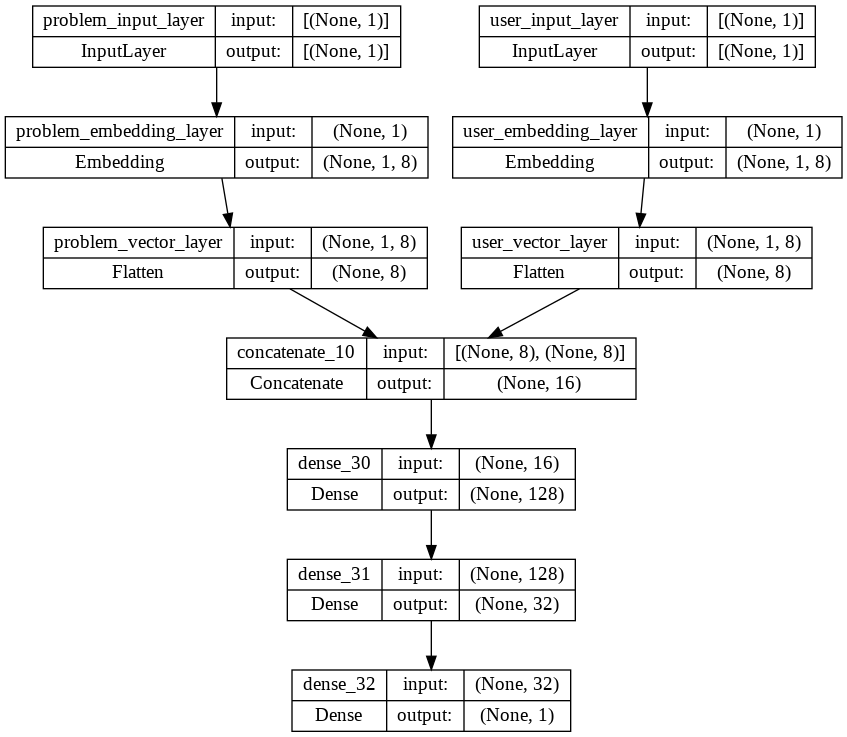

In [180]:
# 모델의 구조
plot_model(model, to_file='dense_layerl.png', show_shapes=True, show_layer_names=True)

In [181]:
# 모델 컴파일
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [182]:
# 모델 훈련시키기
x_train = [train.userid, train.problemid]
y_train= train.rating
history = model.fit(x_train, y_train, batch_size=10, epochs=32, verbose=True)

Epoch 1/32
21/21 [==============================] - 1s 3ms/step - loss: 10.3620 - mse: 10.3620
Epoch 2/32
21/21 [==============================] - 0s 2ms/step - loss: 7.6782 - mse: 7.6782
Epoch 3/32
21/21 [==============================] - 0s 2ms/step - loss: 3.5395 - mse: 3.5395
Epoch 4/32
21/21 [==============================] - 0s 2ms/step - loss: 1.5148 - mse: 1.5148
Epoch 5/32
21/21 [==============================] - 0s 4ms/step - loss: 1.1667 - mse: 1.1667
Epoch 6/32
21/21 [==============================] - 0s 3ms/step - loss: 0.9207 - mse: 0.9207
Epoch 7/32
21/21 [==============================] - 0s 3ms/step - loss: 0.7975 - mse: 0.7975
Epoch 8/32
21/21 [==============================] - 0s 4ms/step - loss: 0.7172 - mse: 0.7172
Epoch 9/32
21/21 [==============================] - 0s 2ms/step - loss: 0.6574 - mse: 0.6574
Epoch 10/32
21/21 [==============================] - 0s 2ms/step - loss: 0.5955 - mse: 0.5955
Epoch 11/32
21/21 [==============================] - 0s 2ms/step - 

Text(0, 0.5, 'training error')

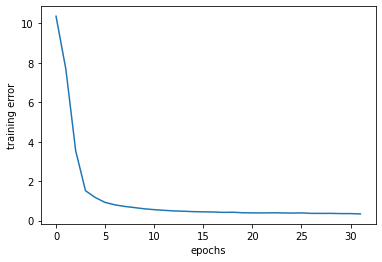

In [183]:
# epoch
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('training error')

In [184]:
model.evaluate([test.userid, test.problemid], test.rating)

2/2 [==============================] - 0s 7ms/step - loss: 1.5464 - mse: 1.5464


[1.5463799238204956, 1.5463799238204956]

In [185]:
predictions = model.predict([test.userid.head(10), test.problemid.head(10)])
for p, t in zip(predictions, test.rating.values[:10]):
    print(p, t)

1/1 [==============================] - 0s 86ms/step
[4.831589] 5
[3.0039382] 1
[4.0527754] 4
[4.476573] 5
[2.3013768] 2
[3.3580337] 4
[1.9436007] 3
[1.9704117] 4
[3.3949656] 2
[4.150893] 4


# 결론
    - 데이터가 적어서 그런지 모델의 정확도가 많이 높지는 않다
    - 다음에 또 만들게 된다면 데이터를 충분히 모아서 하는 게 좋을 것 같다
    - 그래도 대부분 유저가 몇 번째로 푸는 게 적절하게 판단하였다